# GeoSeries

A **GeoSeries** is a specialized data structure in GeoPandas that contains geometrical objects. It can hold points, lines, and polygons, making it an essential tool for geospatial data analysis.

In [1]:
import geopandas as gpd

## Creating a GeoSeries
You can create a GeoSeries from a list of geometries using the gpd.GeoSeries constructor.

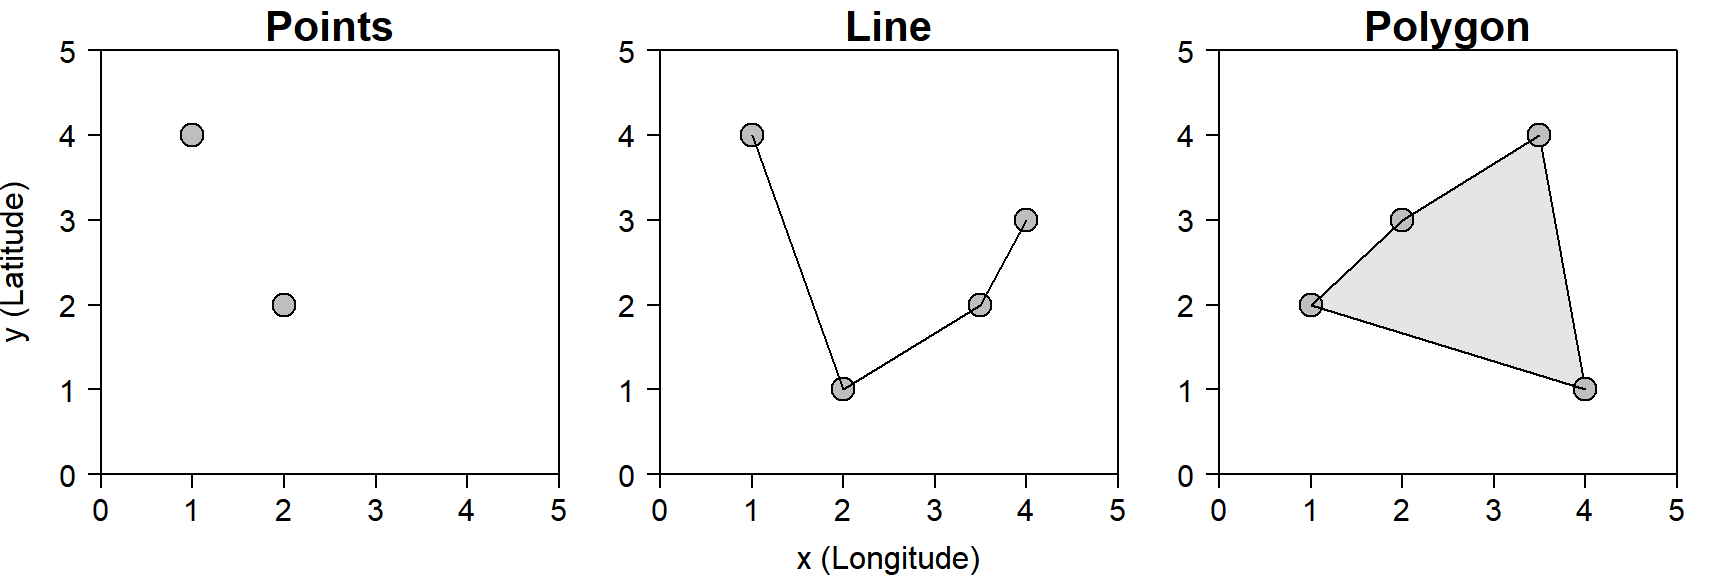

## Points

In [2]:
from shapely.geometry import Point

coordinates = [Point(1, 4), Point(2,2), Point(3, 1)]
points = gpd.GeoSeries(coordinates)
points

,0
0,POINT (1 4)
1,POINT (2 2)
2,POINT (3 1)


In [3]:
print(points)

0    POINT (1 4)
1    POINT (2 2)
2    POINT (3 1)
dtype: geometry


In [4]:
print(type(points))

<class 'geopandas.geoseries.GeoSeries'>


In [5]:
len(points)

3

In [6]:
points.dtype

In [7]:
print(points.name)

None


In [8]:
points.name = 'Points'
points.name

'Points'

In [9]:
points

,Points
0,POINT (1 4)
1,POINT (2 2)
2,POINT (3 1)


<Axes: >

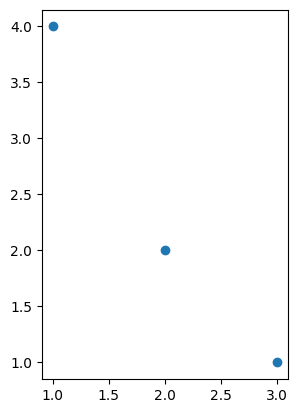

In [10]:
points.plot()

## Lines

In [11]:
from shapely.geometry import LineString, Polygon

line_coordinates = LineString([(1,4), (2,1), (3.5, 2), (4,3)])
line = gpd.GeoSeries(line_coordinates)
line

,0
0,"LINESTRING (1 4, 2 1, 3.5 2, 4 3)"


In [12]:
len(line)

1

<Axes: >

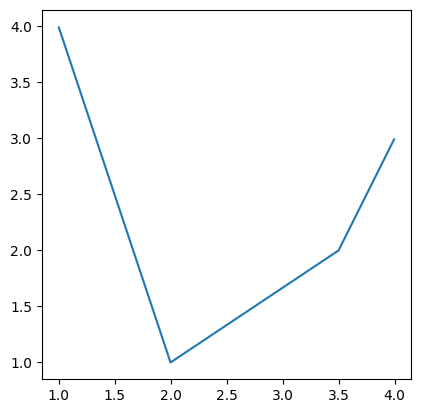

In [13]:
line.plot()

### Euclidean distance

Euclidean distance is a measure of the straight-line distance between two points in Euclidean space. It is commonly used in various fields, including mathematics, computer science, and data analysis, to quantify how far apart two points are.

The formula for Euclidean distance is closely related to the Pythagorean theorem. The Pythagorean theorem states that in a right-angled triangle, the square of the length of the hypotenuse $ c $ is equal to the sum of the squares of the lengths of the other two sides $ a $ and $ b $:

$$
 c^2 = a^2 + b^2
$$

In the context of Euclidean distance, consider a right-angled triangle where the distance between two points forms the hypotenuse, and the differences in their respective coordinates form the other two sides of the triangle.

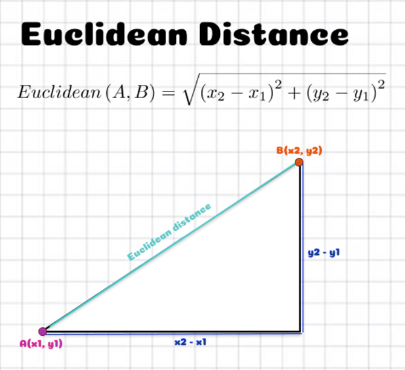

In [14]:
line.length

,0
0,6.083087


### Length Calculation of LineString

#### Points
- $ A = (1, 4) $
- $ B = (2, 1) $
- $ C = (3.5, 2) $
- $ D = (4, 3) $

#### Calculate Distances Between Each Segment

##### Segment AB: From $ A $ to $ B $
$$
\text{Distance}_{AB} = \sqrt{(2 - 1)^2 + (1 - 4)^2} = \sqrt{1^2 + (-3)^2} = \sqrt{1 + 9} = \sqrt{10} \approx 3.162
$$

##### Segment BC: From $ B $ to $ C $
$$
\text{Distance}_{BC} = \sqrt{(3.5 - 2)^2 + (2 - 1)^2} = \sqrt{(1.5)^2 + (1)^2} = \sqrt{2.25 + 1} = \sqrt{3.25} \approx 1.803
$$

##### Segment CD: From $ C $ to $ D $
$$
\text{Distance}_{CD} = \sqrt{(4 - 3.5)^2 + (3 - 2)^2} = \sqrt{(0.5)^2 + (1)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} \approx 1.118
$$

### Total Length
Now, sum the lengths of all segments:
$$
\text{Total Length} = \text{Distance}_{AB} + \text{Distance}_{BC} + \text{Distance}_{CD}
$$
$$
\text{Total Length} \approx 3.162 + 1.803 + 1.118 \approx 6.083
$$

Thus, the total length of the `LineString` is approximately **6.083**.

In [15]:
line.centroid

,0
0,POINT (2.28398 2.20364)


In [16]:
print(type(line.centroid))

<class 'geopandas.geoseries.GeoSeries'>


### Calculate Geometric Centroid of LineString

Given points:
- $ A = (1, 4) $
- $ B = (2, 1) $
- $ C = (3.5, 2) $
- $ D = (4, 3) $

#### Step 1: Calculate Segment Lengths
- $ \text{Distance}_{AB} \approx 3.162 $
- $ \text{Distance}_{BC} \approx 1.803 $
- $ \text{Distance}_{CD} \approx 1.118 $

#### Total Length
$ L \approx 3.162 + 1.803 + 1.118 \approx 6.083 $

#### Step 2: Calculate Midpoints and Weighted Coordinates

1. **Segment AB** (Midpoint):
   - Midpoint: $ \left( \frac{1 + 2}{2}, \frac{4 + 1}{2} \right) = (1.5, 2.5) $
   - Contribution:
     $ \left( 1.5 \cdot 3.162, 2.5 \cdot 3.162 \right) = (4.743, 7.905) $

2. **Segment BC** (Midpoint):
   - Midpoint: $ \left( \frac{2 + 3.5}{2}, \frac{1 + 2}{2} \right) = (2.75, 1.5) $
   - Contribution:
     $ \left( 2.75 \cdot 1.803, 1.5 \cdot 1.803 \right) \approx (4.9575, 2.7045) $

3. **Segment CD** (Midpoint):
   - Midpoint: $ \left( \frac{3.5 + 4}{2}, \frac{2 + 3}{2} \right) = (3.75, 2.5) $
   - Contribution:
     $ \left( 3.75 \cdot 1.118, 2.5 \cdot 1.118 \right) \approx (4.193, 2.795) $

#### Step 3: Calculate Weighted Sums
- **Weighted sum of x-coordinates**:
  $ \text{Weighted}_x = 4.743 + 4.9575 + 4.193 \approx 13.8935 $

- **Weighted sum of y-coordinates**:
  $ \text{Weighted}_y = 7.905 + 2.7045 + 2.795 \approx 13.4045 $

#### Step 4: Calculate Centroid Coordinates
1. **Centroid X-coordinate**:
   $ x_{centroid} = \frac{13.8935}{6.083} \approx 2.284 $

2. **Centroid Y-coordinate**:
   $ y_{centroid} = \frac{13.4045}{6.083} \approx 2.204 $

### Final Centroid Coordinates
Thus, the geometric centroid of the `LineString` is approximately:
$ \text{Centroid} \approx (2.284, 2.204) $

Thus, the centroid of the `LineString` is approximately **(2.284, 2.204)**, representing the average position of all points along the line.

In [17]:
line1 = LineString([ (1,1), (2,3), (3,1) ])     # First line
line2 = LineString([ (4,4), (5,6), (6,5) ])     # Second line

lines = gpd.GeoSeries([line1, line2])
lines

,0
0,"LINESTRING (1 1, 2 3, 3 1)"
1,"LINESTRING (4 4, 5 6, 6 5)"


In [18]:
len(lines)

2

<Axes: >

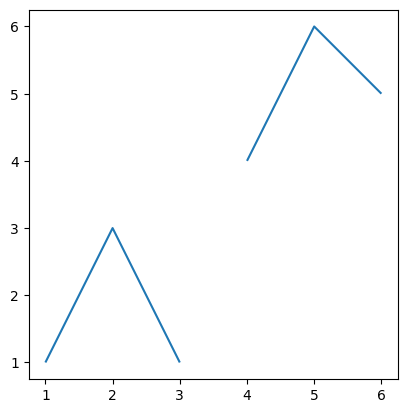

In [19]:
lines.plot()

In [20]:
lines.length

,0
0,4.472136
1,3.650282


In [21]:
lines.centroid

,0
0,POINT (2 2)
1,POINT (4.88743 5.19371)


In [22]:
lines

,0
0,"LINESTRING (1 1, 2 3, 3 1)"
1,"LINESTRING (4 4, 5 6, 6 5)"


In [23]:
lines.bounds

,minx,miny,maxx,maxy
0,1.0,1.0,3.0,3.0
1,4.0,4.0,6.0,6.0


In [24]:
print(type(lines.bounds))

<class 'pandas.core.frame.DataFrame'>


### Bounds of the GeoSeries

The `bounds` method returns the minimum and maximum coordinates that define the bounding box for each geometry in a `GeoSeries`. Specifically, it provides the following four values:

- **minx**: The minimum x-coordinate of the geometry.
- **miny**: The minimum y-coordinate of the geometry.
- **maxx**: The maximum x-coordinate of the geometry.
- **maxy**: The maximum y-coordinate of the geometry.

The output is typically presented in a structured format, such as a DataFrame, where each row corresponds to a geometry in the `GeoSeries`, and the columns represent the four bounding values.

**In our example**:

- **Line 0**:
  - **Minimum x-coordinate (minx)**: $1.0$
  - **Minimum y-coordinate (miny)**: $1.0$
  - **Maximum x-coordinate (maxx)**: $3.0$
  - **Maximum y-coordinate (maxy)**: $3.0$
  
  This line is defined by points that extend from $(1, 1)$ to $(3, 3)$.

- **Line 1**:
  - **Minimum x-coordinate (minx)**: $4.0$
  - **Minimum y-coordinate (miny)**: $4.0$
  - **Maximum x-coordinate (maxx)**: $6.0$
  - **Maximum y-coordinate (maxy)**: $6.0$

  This line is defined by points that extend from $(4, 4)$ to $(6, 6)$.

The bounds represent the smallest rectangle that can enclose each `LineString` geometry in the `GeoSeries`. This information can be useful for spatial analysis and visualization.

### Usefulness of the Bounding Box

The bounding box is useful for:
- Visualizing the spatial extent of geometries.
- Performing spatial analyses, such as intersection or containment checks.
- Optimizing rendering in mapping applications by limiting the area to be processed.

In [25]:
lines.total_bounds

array([1., 1., 6., 6.])

In [26]:
type(lines.total_bounds)

numpy.ndarray

### Explanation of `Total Bounds`

The output of `lines.total_bounds` provides the minimum and maximum coordinates that define the bounding box of the `LineString`.

The result:
`array([1., 1., 6., 6.])`

represents:

- **Minimum x-coordinate**: $1$
- **Minimum y-coordinate**: $1$
- **Maximum x-coordinate**: $6$
- **Maximum y-coordinate**: $6$

#### Bounding Box Details

In this case, the bounding box encompasses the area where all the points of the `LineString` exist. Specifically:

- The bottom-left corner of the bounding box is at $(1, 1)$.
- The top-right corner of the bounding box is at $(6, 6)$.

This box effectively represents the spatial extent of the geometry, which can be useful for visualizations and spatial analyses.

In [27]:
lines.envelope

,0
0,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))"
1,"POLYGON ((4 4, 6 4, 6 6, 4 6, 4 4))"


In [28]:
lines.geometry

,0
0,"LINESTRING (1 1, 2 3, 3 1)"
1,"LINESTRING (4 4, 5 6, 6 5)"


### Explanation of `Envelope`

The `envelope` method returns the minimum bounding rectangle (or envelope) for each geometry in a `GeoSeries`. This rectangle is the smallest rectangle that can completely contain the geometry, effectively representing its spatial extent.

**In our example**:

The output indicates:
- **First Envelope**: A rectangle that bounds the first line, defined by its corner points.
- **Second Envelope**: A rectangle that bounds the second line, also defined by its corner points.

#### Envelope Details

The envelope for each geometry can be defined by:
- The minimum x and y coordinates (bottom-left corner).
- The maximum x and y coordinates (top-right corner).

#### Usefulness of the Envelope

The envelope is useful for:
- Visualizing the overall extent of geometries.
- Performing spatial analyses, such as intersection checks between geometries.
- Simplifying spatial data for optimization in mapping applications.

This method provides a straightforward way to understand the spatial limits of geometries within a `GeoSeries`.


<Axes: >

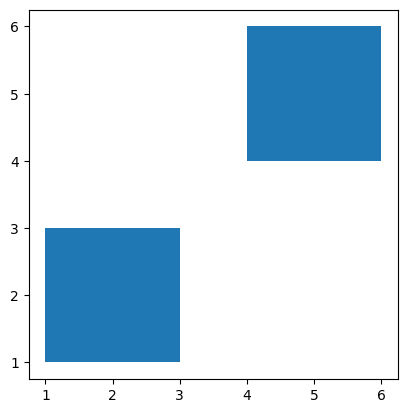

In [29]:
lines.envelope.plot()

## Polygon

In [30]:
polygon = gpd.GeoSeries(Polygon( [ (1,2), (2,3), (3.5,4), (4,1) ] ))
polygon

,0
0,"POLYGON ((1 2, 2 3, 3.5 4, 4 1, 1 2))"


<Axes: >

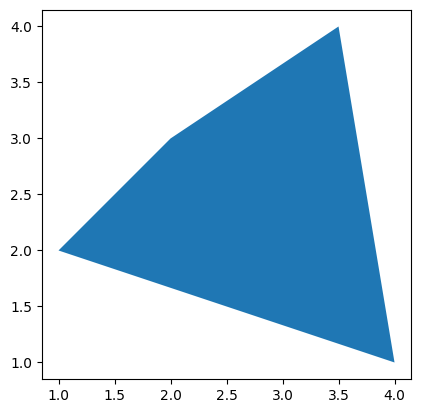

In [31]:
polygon.plot()

In [32]:
polygon.area

,0
0,4.5


In [33]:
print(type(polygon.area))

<class 'pandas.core.series.Series'>


### Calculation of the Area of a Polygon

The area of a polygon can be calculated using the shoelace formula (or surveyor's formula). For a polygon defined by vertices $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, the area $A$ is given by:

$$
A = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right|
$$

where $(x_{n+1}, y_{n+1})$ is $(x_1, y_1)$ to close the polygon.

#### Vertices of the Polygon

For the polygon defined by the vertices:
- $A = (1, 2)$
- $B = (2, 3)$
- $C = (3.5, 4)$
- $D = (4, 1)$
- $E = (1, 2)$ (closing the polygon)

#### Calculation Steps

1. **Set Up Coordinates**:
   - $(x_1, y_1) = (1, 2)$
   - $(x_2, y_2) = (2, 3)$
   - $(x_3, y_3) = (3.5, 4)$
   - $(x_4, y_4) = (4, 1)$
   - $(x_5, y_5) = (1, 2)$

2. **Apply the Shoelace Formula**:
   $$
   A = \frac{1}{2} \left| (1 \cdot 3 + 2 \cdot 4 + 3.5 \cdot 1 + 4 \cdot 2) - (2 \cdot 2 + 3 \cdot 3.5 + 4 \cdot 4 + 1 \cdot 1) \right|
   $$

3. **Calculate Each Term**:
   - First sum:
   $$
   1 \cdot 3 + 2 \cdot 4 + 3.5 \cdot 1 + 4 \cdot 2 = 3 + 8 + 3.5 + 8 = 22.5
   $$
   - Second sum:
   $$
   2 \cdot 2 + 3 \cdot 3.5 + 4 \cdot 4 + 1 \cdot 1 = 4 + 10.5 + 16 + 1 = 31.5
   $$

4. **Calculate the Area**:
   $$
   A = \frac{1}{2} \left| 22.5 - 31.5 \right| = \frac{1}{2} \cdot 9 = 4.5
   $$

5. **Final Area Calculation**:
   The area of the polygon is calculated to be **4.5**.

Thus, the area of the polygon defined by the given vertices is **4.5** square units.

In [35]:
# Create a GeoSeries with different geometries
geometrics = [Point(1,2), LineString([(2,2), (3,3), (4,5)]), Polygon([(0,0), (1,1), (1,0)])]
geo_series = gpd.GeoSeries(geometrics, index=['Point', 'Line', 'Polygon'], name='Geometries')
geo_series

,Geometries
Point,POINT (1 2)
Line,"LINESTRING (2 2, 3 3, 4 5)"
Polygon,"POLYGON ((0 0, 1 1, 1 0, 0 0))"


In [39]:
print(geo_series)

Point                         POINT (1 2)
Line           LINESTRING (2 2, 3 3, 4 5)
Polygon    POLYGON ((0 0, 1 1, 1 0, 0 0))
Name: Geometries, dtype: geometry


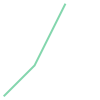

In [36]:
geo_series['Line']

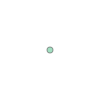

In [37]:
geo_series['Point']

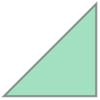

In [38]:
geo_series['Polygon']

In [40]:
geo_series.name

'Geometries'

In [41]:
geo_series.index

Index(['Point', 'Line', 'Polygon'], dtype='object')

In [43]:
geo_series.is_empty

,0
Point,False
Line,False
Polygon,False


In [44]:
geo_series.is_valid

,0
Point,True
Line,True
Polygon,True


<Axes: >

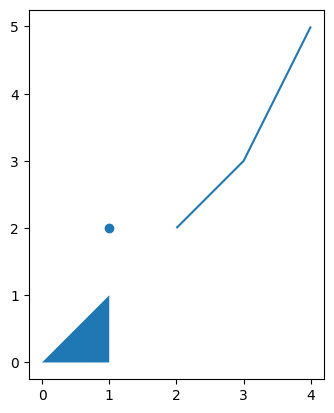

In [45]:
geo_series.plot()

In [47]:
geo_series.bounds

,minx,miny,maxx,maxy
Point,1.0,2.0,1.0,2.0
Line,2.0,2.0,4.0,5.0
Polygon,0.0,0.0,1.0,1.0


In [48]:
geo_series.total_bounds

array([0., 0., 4., 5.])

In [49]:
geo_series.envelope

,0
Point,POINT (1 2)
Line,"POLYGON ((2 2, 4 2, 4 5, 2 5, 2 2))"
Polygon,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"


In [50]:
geo_series.length

,0
Point,0.000000
Line,3.650282
Polygon,3.414214


In [51]:
geo_series.centroid

,0
Point,POINT (1 2)
Line,POINT (3.11257 3.41886)
Polygon,POINT (0.66667 0.33333)


In [52]:
geo_series.area

,0
Point,0.0
Line,0.0
Polygon,0.5
